In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.integrate as scpi

import cbmos_serial as cbmos
import force_functions as ff
import euler_forward as ef
import adams_bashforth as ab
import midpoint as md
import heun as he
import cell as cl

plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6.75, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [2]:
# Simulation parameters
s = 1.0    # rest length
tf = 1.0  # final time
rA = 1.5   # maximum interaction distance

seed=17

params_cubic = {"mu": 5.70, "s": s, "rA": rA}
muR = 9.1
ratio = 0.21
params_poly = {'muA': muR*ratio, 'muR': muR, 'rA': rA, 'rR': 1.0/(1.0-np.sqrt(ratio)/3.0), 'n': 1.0, 'p': 1.0}
mu_gls = 1.95
params_gls = {'mu': mu_gls, 'a':-2*np.log(0.002/mu_gls)}
params = {'cubic': params_cubic, 'pw. quad.': params_poly, 'GLS': params_gls}

In [3]:
force_names = ['cubic', 'pw. quad.', 'GLS']


defcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = {'cubic': defcolors[0], 'pw. quad.': defcolors[1], 'GLS': defcolors[2]}

In [4]:
solvers = {'pw. quad.': cbmos.CBMSolver(ff.piecewise_polynomial, ef.solve_ivp, 1), 
             'cubic': cbmos.CBMSolver(ff.cubic, ef.solve_ivp, 1),
             'GLS': cbmos.CBMSolver(ff.gls, ef.solve_ivp, 1)}

In [5]:
# Initial condition
cell_list = [cl.Cell(0, [0], proliferating=True), cl.Cell(1, [0.3], proliferating=True)]

In [6]:
dt_values = [0.005, 0.025, 0.075, 0.1, 0.2]

In [7]:
sol = {'cubic': [], 'pw. quad.': [], 'GLS': []}
for dt in dt_values:
    N = int(1/dt) + 1
    print([ N, dt])
    #t_data = np.linspace(0,1,N)
    t_data = np.arange(0,1,dt)
    
    for force in force_names:
        history = solvers[force].simulate(cell_list, t_data, params[force], {'dt': dt}, seed=seed)
        y = np.array([np.abs(clt[1].position - clt[0].position) for clt in history])
        sol[force].append(y)

[201, 0.005]
[41, 0.025]
[14, 0.075]
[11, 0.1]
[6, 0.2]


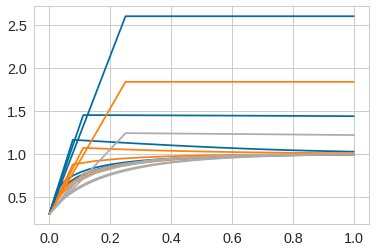

In [8]:
N = [200,40, 14, 10, 5]
for i, dt in enumerate(dt_values):
    for force in force_names: 
        plt.plot(np.linspace(0,tf,N[i]), sol[force][i], label=force, color=colors[force])

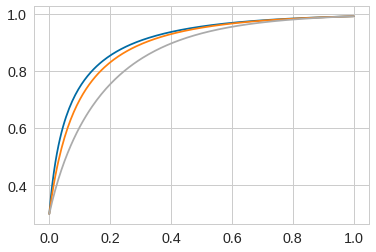

In [9]:
linestyles = ['-', '--', ':']
for i, dt in enumerate(dt_values[0:1]):
    for force in force_names: 
        plt.plot(np.linspace(0,tf,N[i]), sol[force][i], label=force, color=colors[force], linestyle=linestyles[i])
#plt.legend()

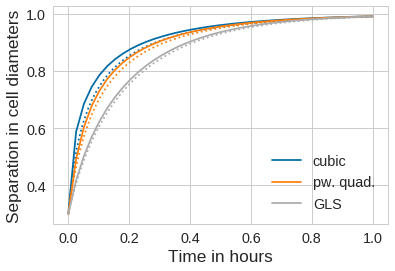

In [10]:
linestyles = ['-', '--', ':']
for i, dt in enumerate(dt_values[1:2]):
    for force in force_names: 
        plt.plot(np.linspace(0,tf,N[0]), sol[force][0], color=colors[force], linestyle=linestyles[2])
        plt.plot(np.linspace(0,tf,N[i+1]), sol[force][i+1], label=force, color=colors[force], linestyle=linestyles[i])
        
plt.xlabel('Time in hours')
plt.ylabel('Separation in cell diameters')
plt.legend()
plt.savefig('overshoot_dt0_025.pdf', bbox_inches='tight')

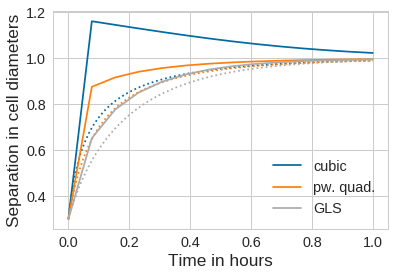

In [11]:
linestyles = ['-', '--', ':']
for i, dt in enumerate(dt_values[2:3]):
    for force in force_names: 
        plt.plot(np.linspace(0,tf,N[0]), sol[force][0], color=colors[force], linestyle=linestyles[2])
        plt.plot(np.linspace(0,tf,N[i+2]), sol[force][i+2], label=force, color=colors[force], linestyle=linestyles[i])
plt.legend()
plt.xlabel('Time in hours')
plt.ylabel('Separation in cell diameters')
plt.savefig('overshoot_dt0_075.pdf', bbox_inches='tight')

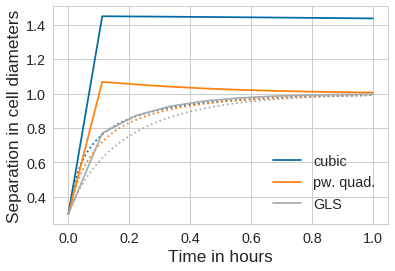

In [12]:
linestyles = ['-', '--', ':']
for i, dt in enumerate(dt_values[3:4]):
    for force in force_names: 
        plt.plot(np.linspace(0,tf,N[0]), sol[force][0], color=colors[force], linestyle=linestyles[2])
        plt.plot(np.linspace(0,tf,N[i+3]), sol[force][i+3], label=force, color=colors[force], linestyle=linestyles[i])
plt.legend()
plt.xlabel('Time in hours')
plt.ylabel('Separation in cell diameters')
plt.savefig('overshoot_dt0_1.pdf', bbox_inches='tight')

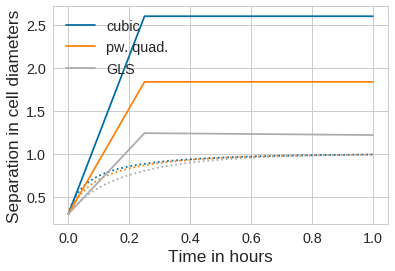

In [13]:
linestyles = ['-', '--', ':']
for i, dt in enumerate(dt_values[4:]):
    for force in force_names: 
        plt.plot(np.linspace(0,tf,N[0]), sol[force][0], color=colors[force], linestyle=linestyles[2])
        plt.plot(np.linspace(0,tf,N[i+4]), sol[force][i+4], label=force, color=colors[force], linestyle=linestyles[i])
plt.legend()
plt.xlabel('Time in hours')
plt.ylabel('Separation in cell diameters')
plt.savefig('overshoot_dt0_2.pdf', bbox_inches='tight')